<a href="https://colab.research.google.com/github/Kranthi2201k/ML-lab/blob/main/3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distance Metrics: Euclidean
Distances: [ 5.          5.09901951 15.03329638]
Top-k Neighbors:[(np.float64(5.0), np.int64(1), 'Apple'), (np.float64(5.0990195135927845), np.int64(2), 'Apple'), (np.float64(15.033296378372908), np.int64(0), 'Apple')]
Predicted Fruit: Apple(Class 0)



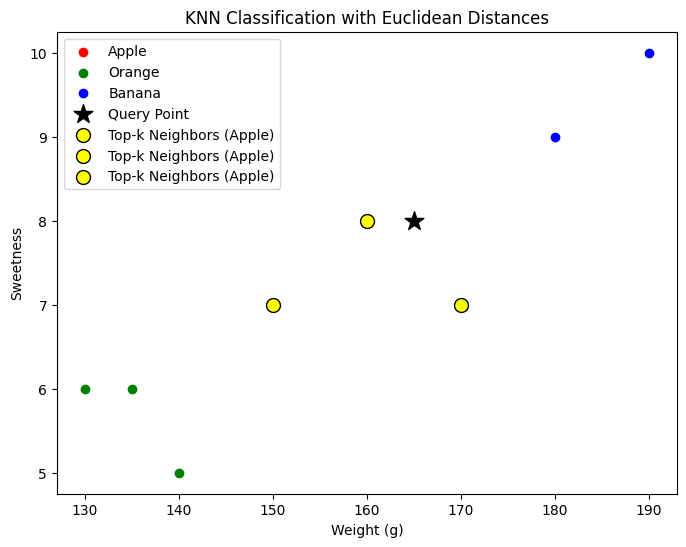

Distance Metrics: Manhattan
Distances: [ 5.  6. 16.]
Top-k Neighbors:[(np.float64(5.0), np.int64(1), 'Apple'), (np.float64(6.0), np.int64(2), 'Apple'), (np.float64(16.0), np.int64(0), 'Apple')]
Predicted Fruit: Apple(Class 0)



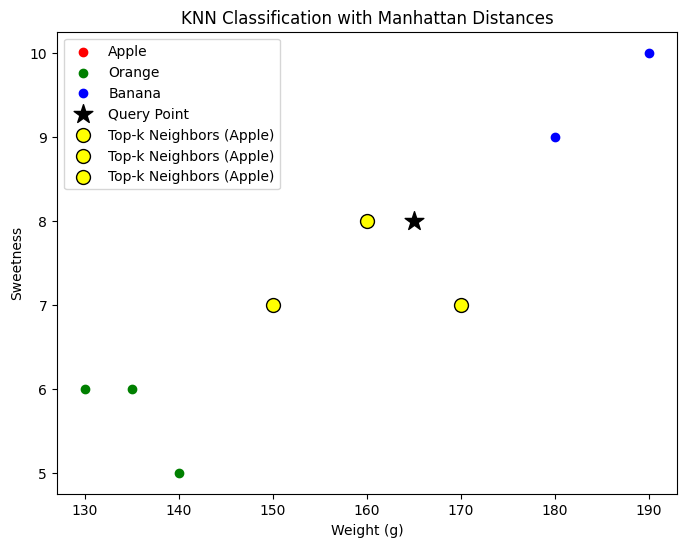

Distance Metrics: Cosine
Distances: [1.14229498e-06 1.14229498e-06 1.64543405e-06]
Top-k Neighbors:[(np.float64(1.1422949769412938e-06), np.int64(6), 'Banana'), (np.float64(1.1422949771633384e-06), np.int64(1), 'Apple'), (np.float64(1.6454340540095203e-06), np.int64(0), 'Apple')]
Predicted Fruit: Apple(Class 0)



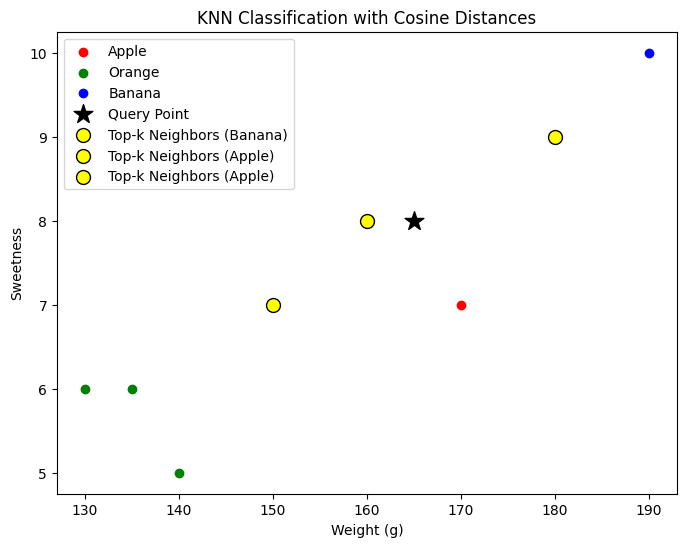

In [2]:
import numpy as np
import matplotlib.pyplot as plt # Corrected: pylot -> pyplot
from sklearn.neighbors import KNeighborsClassifier # Corrected: KNeighbours -> KNeighbors
#sample Fruits Dataset:[weight,sweetness,Label]
#Label:0 = Apple,1 = Orange,2 = banana
data = np.array([
    [150,7,0], #Apple
    [160,8,0], #Apple
    [170,7,0], #Apple
    [130,6,1], #Orange
    [140,5,1], #Orange
    [135,6,1], #Orange
    [180,9,2], #Banana
    [190,10,2], #Banana
])

#Features(Weight,Sweetness) and Labels (Fruit Type)
X = data[:,:-1] #Features: Weight and Sweetness
y = data[:,2] #Labels: 0=Apple, 1=Orange, 2=Banana
#Query Point: New fruit to classify
query_point = np.array([[165,8]]) #Weight: 165g, Sweetness: 8
K = 3 #Number of nearest neighbors
#initialize KNN classifier with different distances metrics
metrics = ["euclidean","manhattan","cosine"]
fruit_classes = {0:"Apple",1:"Orange",2:"Banana"}
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=K, metric=metric) # Corrected: KNeighbours -> KNeighbors, n_neighbours -> n_neighbors
    knn.fit(X, y) # Corrected: Y -> y
    distances, neighbours = knn.kneighbors(query_point)
    print(f"Distance Metrics: {metric.capitalize()}")
    print(f"Distances: {distances[0]}")
    #Display the top-k nearest neighbours with distances and their class labels
    top_k_neighbours = sorted(zip(distances[0], neighbours[0]), key=lambda x:x[0])
    # Corrected line 34:
    top_k_with_labels = [(distance, idx, fruit_classes[y[idx]]) for distance, idx in top_k_neighbours]
    print(f"Top-k Neighbors:{top_k_with_labels}")
    #Predict the class of the query point
    prediction = knn.predict(query_point)[0]
    print(f"Predicted Fruit: {fruit_classes[prediction]}(Class {prediction})\n") # Corrected: missing parenthesis and newline char
    #Plot the dataset and query point
    plt.figure(figsize=(8,6))
    colors=['r','g','b'] # Corrected: b -> 'b'
    labels = ['Apple','Orange','Banana']

    for i in range(3): # We have 3 Classes
        class_data = X[y==i] # Corrected: class _data -> class_data, Y -> y
        plt.scatter(class_data[:,0],class_data[:,1],c=colors[i],label=labels[i]) # Corrected: classs_data -> class_data
    #Plot the query point (black star)
    plt.scatter(query_point[0,0],query_point[0,1],color='black',marker='*',s=200,label='Query Point')
    #Highlight the top k nearest neighbors
    for distance, idx, label_name in top_k_with_labels: # Corrected: for_,idx,label in top_k with_labels:
        plt.scatter(X[idx,0],X[idx,1],color='yellow',edgecolors='black',s=100,label=f'Top-k Neighbors ({label_name})') # Corrected label variable
    plt.title(f"KNN Classification with {metric.capitalize()} Distances")
    plt.xlabel('Weight (g)')
    plt.ylabel('Sweetness')
    plt.legend()
    plt.show()